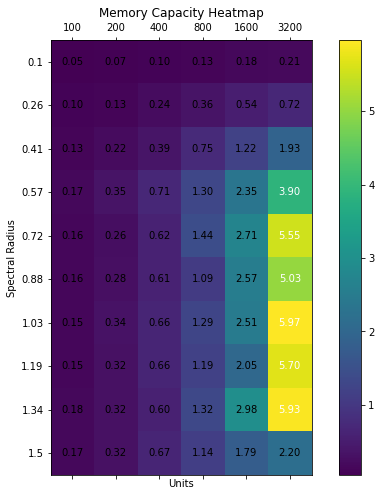

In [56]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 結果ファイルのパス
output_dir = "jupyter/src/memory_capacity/results"
pickle_save_path = os.path.join(output_dir, "all_memory_capacities.pkl")

# Pickleファイルからデータを読み込む
with open(pickle_save_path, "rb") as f:
    results = pickle.load(f)

# データを整形してヒートマップ表示用に変換
spectral_radii = sorted(set(result["Spectral Radius"] for result in results))
units_list = sorted(set(result["Units"] for result in results))
memory_capacity_matrix = np.zeros((len(spectral_radii), len(units_list)))

for result in results:
    sr_index = spectral_radii.index(result["Spectral Radius"])
    units_index = units_list.index(result["Units"])
    memory_capacity_matrix[sr_index, units_index] = result["Memory Capacity"]

# ヒートマップの作成
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(memory_capacity_matrix, cmap="viridis")

# 軸ラベルとタイトルの設定
ax.set_xticks(range(len(units_list)))
ax.set_xticklabels(units_list)
ax.set_yticks(range(len(spectral_radii)))
ax.set_yticklabels(np.round(spectral_radii, 2))
plt.xlabel("Units")
plt.ylabel("Spectral Radius")
plt.title("Memory Capacity Heatmap")

# カラーバーの追加
fig.colorbar(cax)

# 値の表示
for (i, j), val in np.ndenumerate(memory_capacity_matrix):
    ax.text(j, i, f"{val:.2f}", ha="center", va="center", color="white" if val > memory_capacity_matrix.max() / 2 else "black")

plt.show()